In [8]:
%run hyperfit.py "osfstorage-archive/popdata2010.dat" "parameters.txt" 5

FileNotFoundError: [Errno 2] No such file or directory: 'parameters.txt'

               2022                                                 ... 1970  \
CCA3            NaN    AD  AE       AF  AG  AI      AL  AM  AO  AR  ...   VI   
Name                                                                ...        
Afghanistan     NaN   NaN NaN  41129.0 NaN NaN     NaN NaN NaN NaN  ...  NaN   
Albania         NaN   NaN NaN      NaN NaN NaN  2842.0 NaN NaN NaN  ...  NaN   
Algeria         NaN   NaN NaN      NaN NaN NaN     NaN NaN NaN NaN  ...  NaN   
American Samoa  NaN   NaN NaN      NaN NaN NaN     NaN NaN NaN NaN  ...  NaN   
Andorra         NaN  80.0 NaN      NaN NaN NaN     NaN NaN NaN NaN  ...  NaN   

                                                    
CCA3            VN  VU  WF  WS  YE  YT  ZA  ZM  ZW  
Name                                                
Afghanistan    NaN NaN NaN NaN NaN NaN NaN NaN NaN  
Albania        NaN NaN NaN NaN NaN NaN NaN NaN NaN  
Algeria        NaN NaN NaN NaN NaN NaN NaN NaN NaN  
American Samoa NaN NaN NaN NaN NaN NaN Na

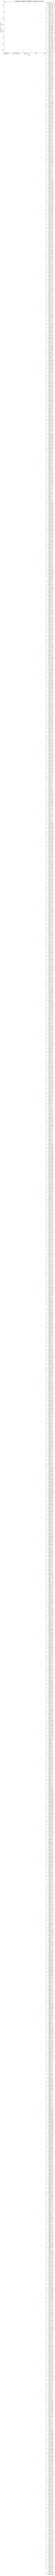

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt


# Load the CSV file into a pandas dataframe
df = pd.read_csv('World Population Live Dataset.csv')

# Pivot the dataframe to get the population data for each year for each country
df_pivot = df.pivot(index='Name', columns='CCA3', values=['2022', '2020', '2015', '2010', '2000', '1990', '1980', '1970'])

print(df_pivot.head())

# Plot the population growth for each country over time
fig, ax = plt.subplots(figsize=(10,10))
df_pivot.plot(ax=ax)
ax.set_title('Population Growth for Different Countries over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Population (in millions)')
plt.show()

In [ ]:

data1 = pd.read_csv("data_source1.csv")
data2 = pd.read_csv("data_source2.csv")
# ... add more data sources as needed

# Merge data sources into a single dataframe
data = data1.merge(data2, on="date")  # assuming there's a "date" column for merging
# ... merge additional data sources

# Preprocess the data (handling missing values, normalization, etc.)
data.fillna(method="ffill", inplace=True)  # fill missing values
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Step 3: Feature engineering
# (Select relevant features based on domain knowledge, correlation analysis, etc.)

# Step 4: Split the data
X = data_scaled[:, :-1]  # assuming the last column is the target variable
y = data_scaled[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Choose the PLRNN architecture
# (You may need to customize this architecture according to your problem and data)

class PLRNN(tf.keras.Model):
    def __init__(self, num_hidden_units):
        super(PLRNN, self).__init__()
        self.dense = tf.keras.layers.Dense(num_hidden_units)
        self.rnn = tf.keras.layers.RNN(
            tf.keras.layers.SimpleRNNCell(num_hidden_units), return_sequences=True
        )

    def call(self, inputs):
        x = self.dense(inputs)
        x = self.rnn(x)
        return x

# Step 6: Train the model
num_hidden_units = 64
model = PLRNN(num_hidden_units)
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Step 7: Evaluate the model
model.evaluate(X_test, y_test)